In [97]:
import numpy as np
import matplotlib.pyplot as plt

1. Численно решить краевую задачу на основе одномерного уравнения теплопроводности методом конечных разностей на равномерной сетке с аппроксимацией по времени: a) явным методом б) неявным методом.

$$\begin{matrix} \rho c \Large \frac{\delta T}{\delta t} \normalsize  = \lambda \Large \frac{\delta^2 T}{\delta x^2} \normalsize, & 0 < x < L; \\ t = 0 : T = T_0, & 0 \le x \le L. \\ x = 0 : T = T_l, & t > 0; \\ x = L : T = T_r, & t > 0. \end{matrix}$$

Значения параметов для стали: $L = 0.1 м$, $\lambda = 46 Вт/(м \cdot^\circ C)$, $\rho = 7800 кг/м^3$, $c = 460 Дж/(кг \cdot^\circ C)$, $T_0 = 20^\circ C$, $T_l = 300^\circ C$, $T_r = 100^\circ C$, время процесса нагрева 60 секунд.

In [98]:
N = 100
t_end = 60
L = 0.1
lamda = 46
ro = 7800
c = 460
T0 = 20
Tl = 300
Tr = 100
mf = 500

In [99]:
# явный метод
T1 = [float(i) for i in range(mf)]
TT = [float(i) for i in range(mf)]
a = lamda / (ro * c)
h = L / (N - 1)
tau = (0.25 * h**2) / a
for i in range(1, N - 1):
    T1[i] = T0
T1[0] = Tl
T1[N] = Tr
time = 0
while time < t_end:
    time += tau
    for i in range(N):
        TT[i] = T1[i]
    for i in range(1, N - 1):
        T1[i] = TT[i] + ((a * tau) / (h**2)) * (TT[i + 1] - 2.0 * TT[i] + TT[i - 1])

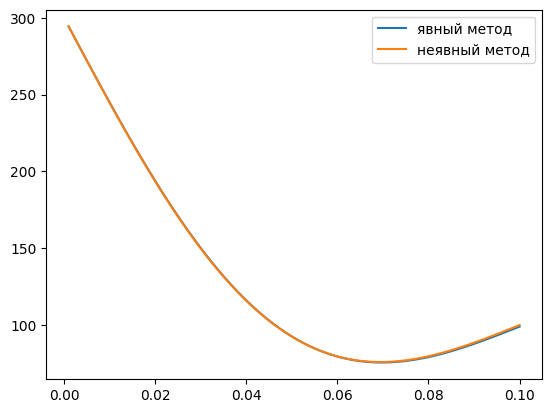

In [100]:
# неявный метод
alfa = [float(i) for i in range(1, mf + 1)]
beta = [float(i) for i in range(1, mf + 1)]
T2   = [float(i) for i in range(1, mf + 1)]
h = L / (N - 1)
tau = t_end / 100.0
for i in range(N):
    T2[i] = T0
time = 0
while time < t_end:
    time += tau
    alfa[0] = 0.0
    beta[0] = Tl
    for i in range(1, N - 1):
        ai = lamda / (h**2)
        bi = ((2.0 * lamda) / (h**2)) + ((ro * c) / tau)
        ci = ai
        fi = -(ro * c * T2[i]) / tau
        alfa[i] = ai / (bi - ci * alfa[i - 1])
        beta[i] = (ci * beta[i - 1] - fi) / (bi - ci * alfa[i - 1])
    T2[N - 1] = Tr
    for i in range(N - 2, 0, -1):
        T2[i] = alfa[i] * T2[i + 1] + beta[i]
x = []
for i in range(1, N):
    x.append(h * i)
x = np.array(x)
plt.plot(x, T1[1:N], label="явный метод")
plt.plot(x, T2[1:N], label="неявный метод")
plt.legend()
plt.show()

2. Численно решить краевую задачу для уравнения теплопроводности в неоднородной области методом конечных разностей на равномерной сетке с аппроксимацией по времени неявным методом.

$$\begin{cases} \rho_1 c_1 \large \frac{\delta T_1}{\delta t} \normalsize  = \lambda_1 \large \frac{\delta^2 T_1}{\delta x^2} \normalsize, & 0 < x < x^* \\ \rho_2 c_2 \large \frac{\delta T_2}{\delta t} \normalsize  = \lambda_2 \large \frac{\delta^2 T_2}{\delta x^2} \normalsize, & x^* < x < L. \end{cases}$$
$$\begin{matrix} t = 0 : T = T_0, & 0 \le x \le L. \\ x = 0 : T = T_l, & t > 0; \\ x = L : T = T_r, & t > 0. \end{matrix}$$
$$\begin{cases} T_1(x^*, t) = T_2(x^*, t); \\ -\lambda_1 \large \frac{\delta T_1}{\delta x} |_{x = x^*} = -\lambda_2 \large \frac{\delta T_2}{\delta x} |_{x = x^*} \end{cases}$$

Значения параметров для неодродной области (составной пластины): $L = 0.3 м$, $x^* = 0.15м$, $T_0 = 10^\circ C$,

часть 1 соответствует стали: $\lambda_1 = 46Вт/(м \cdot^\circ C)$, $\rho_1 = 7800кг/^3$, $c_1 = 460Дж/(кг \cdot^\circ C)$.

часть 2 соответствует меди: $\lambda_2 = 384Вт/(м \cdot^\circ C)$, $\rho_2 = 8800кг/^3$, $c_2 = 381Дж/(кг \cdot^\circ C)$.

$T_l = 100^\circ C$, $T_r = 50^\circ C$.

Определить температурное поле через 30, 180, 600 секунд.

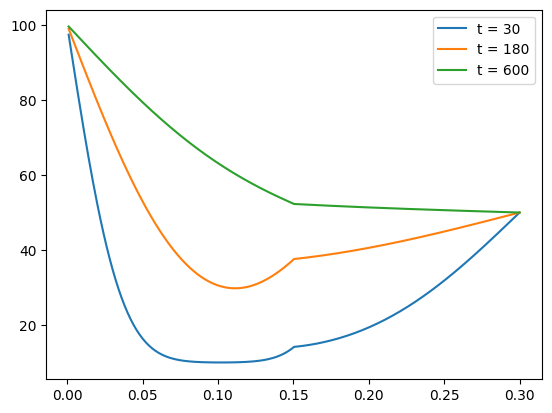

In [101]:
mf = 500
N1 = 150
N2 = 150
lamda1 = 46
lamda2 = 384
ro1 = 7800
ro2 = 8800
c1 = 460
c2 = 381
L = 0.3
Tl = 100
Tr = 50
T0 = 10
N = N1 + N2
h = L / (N - 1)
a1 = lamda1 / (ro1 * c1)
a2 = lamda2 / (ro2 * c2)

def f(t_end = 30):
    tau = t_end / 100.0

    T = [float(i) for i in range(mf)]
    alfa = [float(i) for i in range(mf)]
    beta = [float(i) for i in range(mf)]

    for i in range(N):
        T[i] = T0

    time = 0
    while time < t_end:
        time += tau
        alfa[0] = 0.0
        beta[0] = Tl
        for i in range(1, N1):
            ai = lamda1 / (h**2)
            bi = ((2.0 * lamda1) / (h**2)) + ((ro1 * c1) / tau)
            ci = ai
            fi = -(ro1 * c1 * T[i]) / tau
            alfa[i] = ai / (bi - ci * alfa[i - 1])
            beta[i] = (ci * beta[i - 1] - fi) / (bi - ci * alfa[i - 1])
        alfa[N1] = (2.0 * a1 * a2 * tau * lamda2) / (
            (2.0 * a1 * a2 * tau * (lamda2 + lamda1 * (1 - alfa[i - 1])))
            + (h**2 * (lamda1 * a2 + lamda2 * a1))
        )
        beta[N1] = (
            (2.0 * a1 * a2 * tau * lamda1 * beta[N1 - 1])
            + (h**2 * (a1 * lamda2 + a2 * lamda1) * T[N1])
        ) / (
            (2.0 * a1 * a2 * tau * (lamda2 + lamda1 * (1 - alfa[N1 - 1])))
            + (h**2 * (a1 * lamda2 + a2 * lamda1))
        )
        for i in range(N1 + 1, N - 1):
            ai = lamda2 / (h**2)
            bi = ((2.0 * lamda2) / (h**2)) + ((ro2 * c2) / tau)
            ci = ai
            fi = -(ro2 * c2 * T[i]) / tau
            alfa[i] = ai / (bi - ci * alfa[i - 1])
            beta[i] = (ci * beta[i - 1] - fi) / (bi - ci * alfa[i - 1])
        T[N - 1] = Tr
        for i in range(N - 2, 0, -1):
            T[i] = alfa[i] * T[i + 1] + beta[i]
    x = []
    for i in range(1, N):
        x.append(h * i)
    x = np.array(x)
    plt.plot(x, T[1:N], label=f"t = {t_end}")
f(30)
f(180)
f(600)
plt.legend()
plt.show()